In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

# B. LOAD THE DATASET

In [2]:
#LOADING THE SELECTED 11K DATASET
df = pd.read_csv("/content/tweets.csv")
df = pd.read_csv("/content/tweets.csv",index_col="id")
df.head(5)

,keyword,location,text,target
id,,,,
0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0


In [3]:
df.tail(5)

,keyword,location,text,target
id,,,,
11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0
11369,wrecked,NaN,Jake Corway wrecked while running 14th at IRP.,1


## Get shape of the data

In [4]:
df.shape

(11370, 4)

## Get full description

In [5]:
df.describe()

,target
count,11370.000000
mean,0.185928
std,0.389066
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11370 entries, 0 to 11369
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   keyword   11370 non-null  object
 1   location  7952 non-null   object
 2   text      11370 non-null  object
 3   target    11370 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 444.1+ KB


In [7]:
df.isnull()


,keyword,location,text,target
id,,,,
0,False,True,False,False
1,False,True,False,False
2,False,False,False,False
3,False,False,False,False
4,False,True,False,False
...,...,...,...,...
11365,False,False,False,False
11366,False,False,False,False
11367,False,False,False,False


In [8]:
df.isnull().sum()

,0
keyword,0
location,3418
text,0
target,0


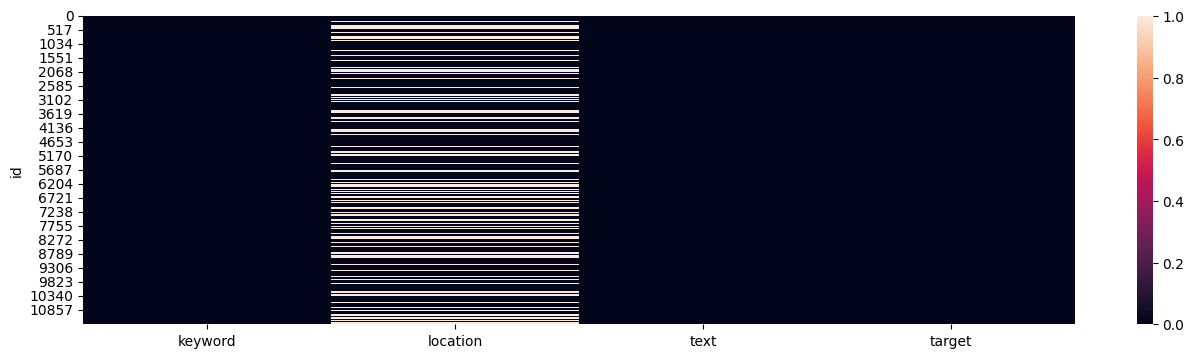

In [9]:
## heatmap for the dataset
plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [10]:
for k in df.keys():
    print(k,df[k].unique()[:5])

keyword ['ablaze' 'accident' 'aftershock' 'airplane%20accident' 'ambulance']
location [nan 'New York City' 'Morgantown, WV' 'OC' 'London, England']
text ['Communal violence in Bhainsa, Telangana. "Stones were pelted on Muslims\' houses and some houses and vehicles were set ablaze…'
 'Telangana: Section 144 has been imposed in Bhainsa from January 13 to 15, after clash erupted between two groups on January 12. Po…'
 'Arsonist sets cars ablaze at dealership https://t.co/gOQvyJbpVI'
 'Arsonist sets cars ablaze at dealership https://t.co/0gL7NUCPlb https://t.co/u1CcBhOWh9'
 '"Lord Jesus, your love brings freedom and pardon. Fill me with your Holy Spirit and set my heart ablaze with your l… https://t.co/VlTznnPNi8']
target [1 0]



### Fill missing values

In [11]:
df.location.isnull().sum()

3418

In [12]:
df.location.unique()

array([nan, 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

In [13]:
df.location.value_counts()

,count
location,
United States,96
Australia,83
"London, England",81
UK,77
India,74
...,...
Great State of Texas,1
"Karatina, Kenya",1
The internet or the gym,1


In [14]:
df.location.mode()

,location
0,United States


In [15]:
most_frequent_location = df['location'].mode()[0]

In [16]:
df['location'] = df['location'].apply(lambda x: most_frequent_location if pd.isna(x) else x)

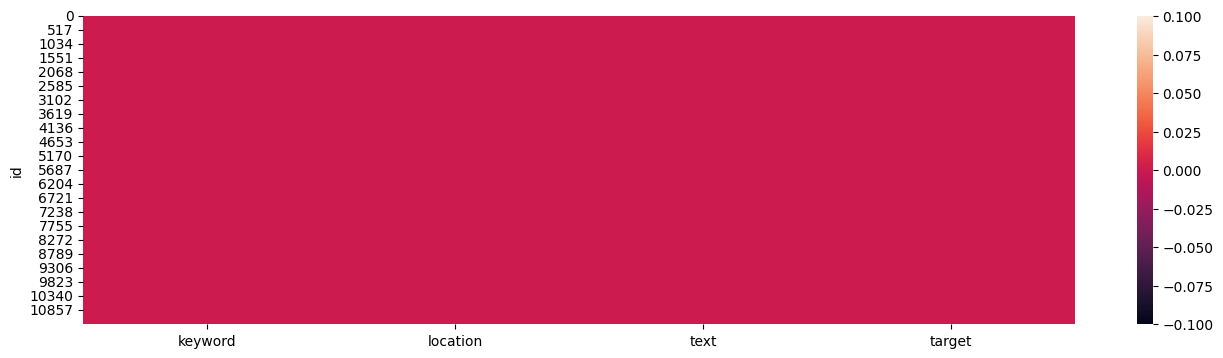

In [17]:
# Visualize missing values again to make sure that all features are having 0 missing values

plt.figure(figsize=(16,4))
sns.heatmap(df.isnull())
plt.show()

In [18]:
df.isnull().sum()

,0
keyword,0
location,0
text,0
target,0


In [19]:
df.head(2)

,keyword,location,text,target
id,,,,
0,ablaze,United States,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,United States,Telangana: Section 144 has been imposed in Bha...,1


In [20]:
# Basic function for text cleaning
import re

def textCleaning(text):

    op = re.sub(r"https://[a-zA-Z0-9/\.]+", " ", text)
    op = re.sub(r"\s+", " ", op)

    return op

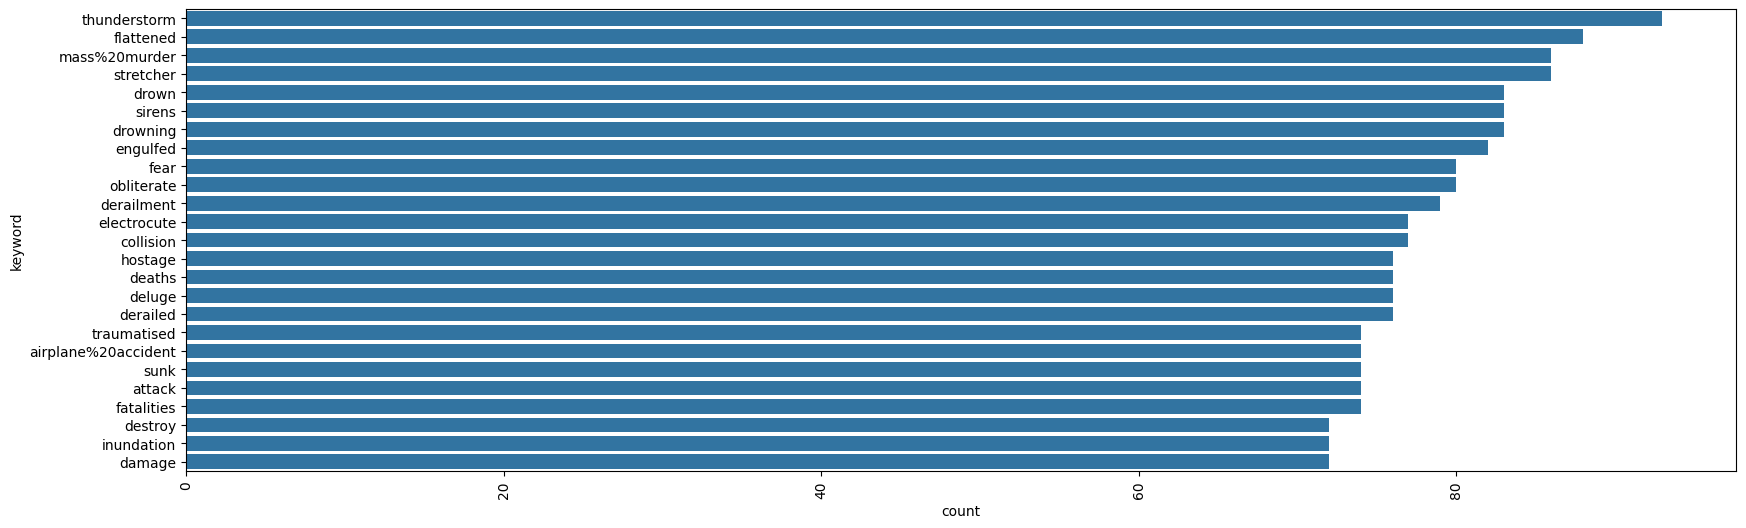

In [21]:
# Infer insights of Data using Visualization
plt.figure(figsize=(20,6))
sns.countplot(df.keyword,order=df.keyword.value_counts().index[:25])
plt.xticks(rotation=90)
plt.show()

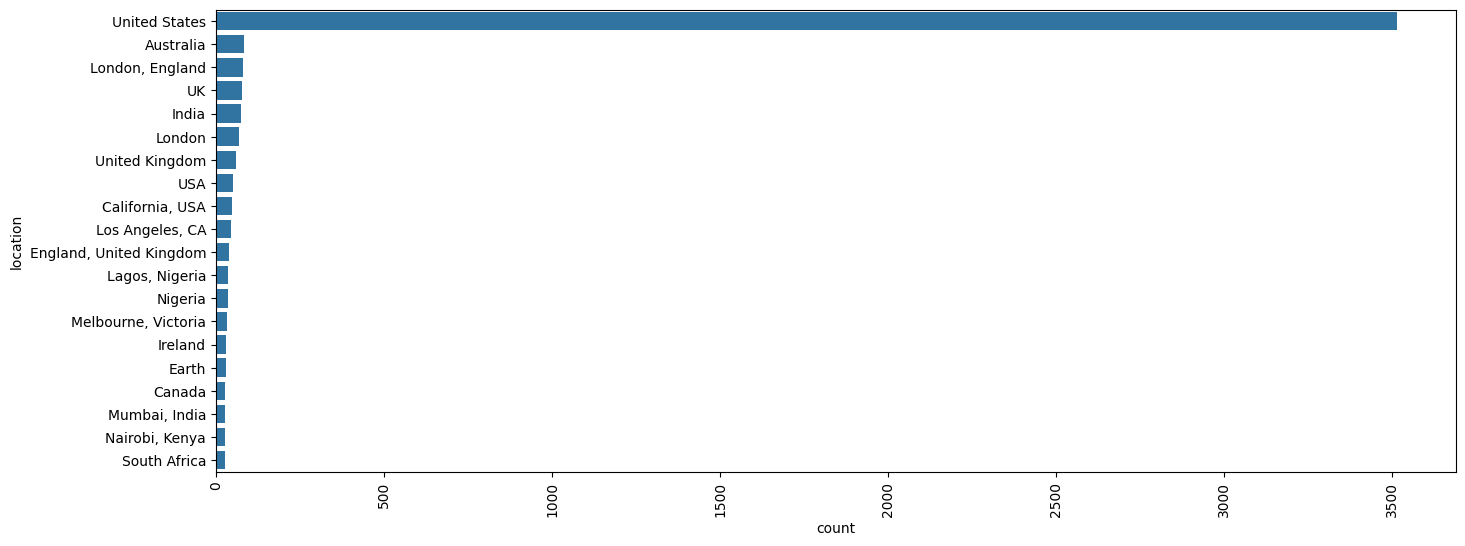

In [22]:
plt.figure(figsize=(16,6))
sns.countplot(df.location,order=df.location.value_counts().index[:20])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='target', ylabel='Count'>

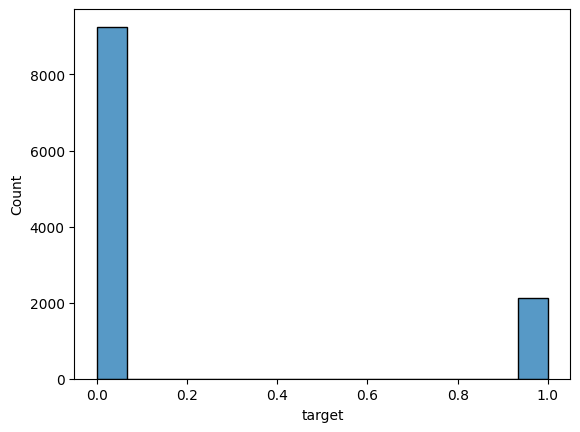

In [23]:
# Histogram for discrete data to understand central tendency of data
sns.histplot(df.target)

 ### Bi-variate plot

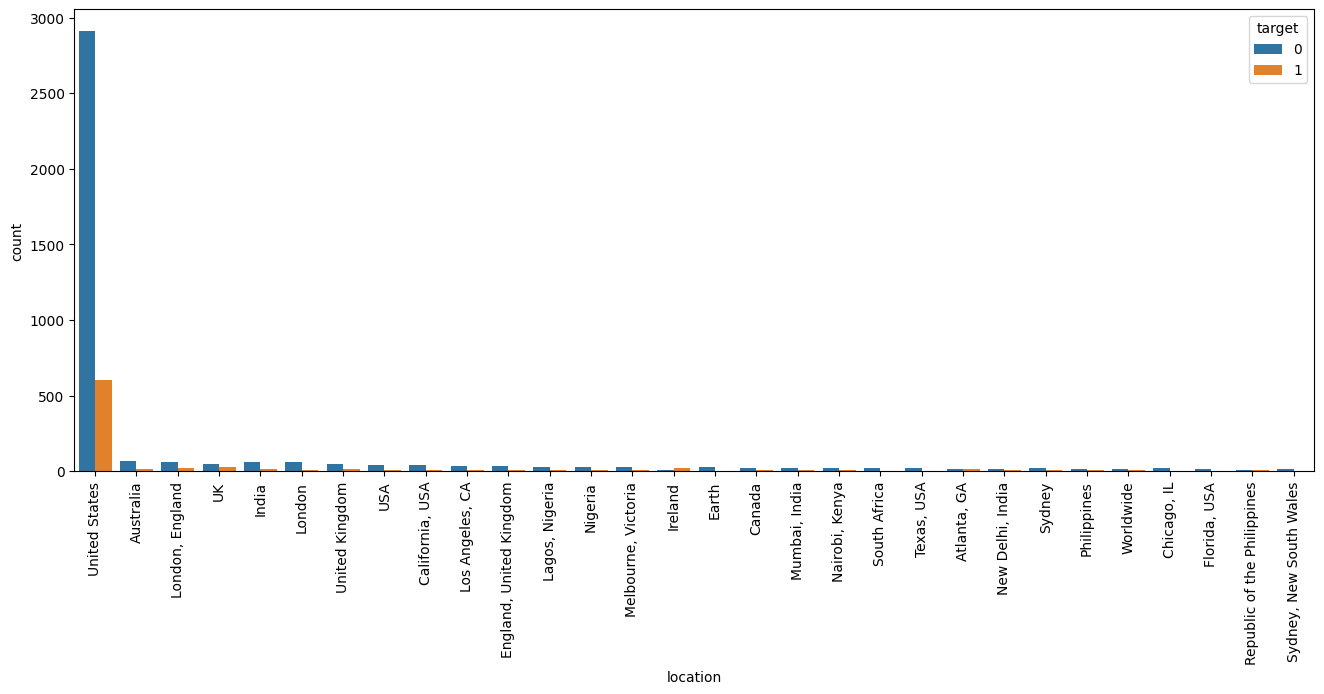

In [24]:
plt.figure(figsize=(16,6))
sns.countplot(x='location', data=df, order=df['location'].value_counts().index[:30], hue='target')
plt.xticks(rotation=90)
plt.show()

### Text visualization using WordCloud


In [25]:
df.text


,text
id,
0,"Communal violence in Bhainsa, Telangana. ""Ston..."
1,Telangana: Section 144 has been imposed in Bha...
2,Arsonist sets cars ablaze at dealership https:...
3,Arsonist sets cars ablaze at dealership https:...
4,"""Lord Jesus, your love brings freedom and pard..."
...,...
11365,Media should have warned us well in advance. T...
11366,i feel directly attacked 💀 i consider moonbin ...
11367,i feel directly attacked 💀 i consider moonbin ...


In [26]:
full_txt = " ".join(df.text[df.target == 1])

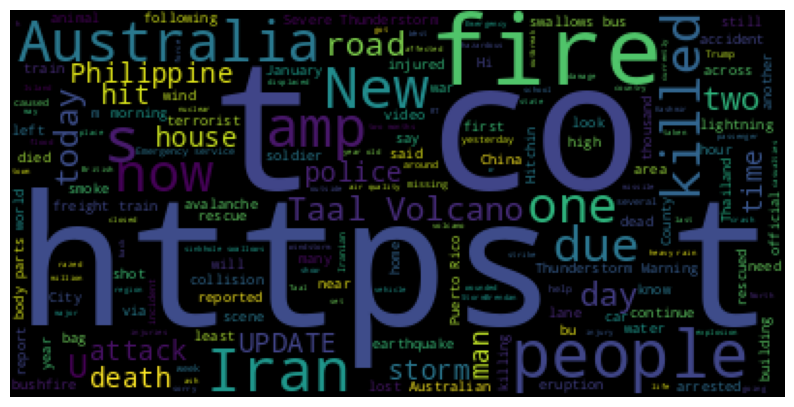

In [27]:
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

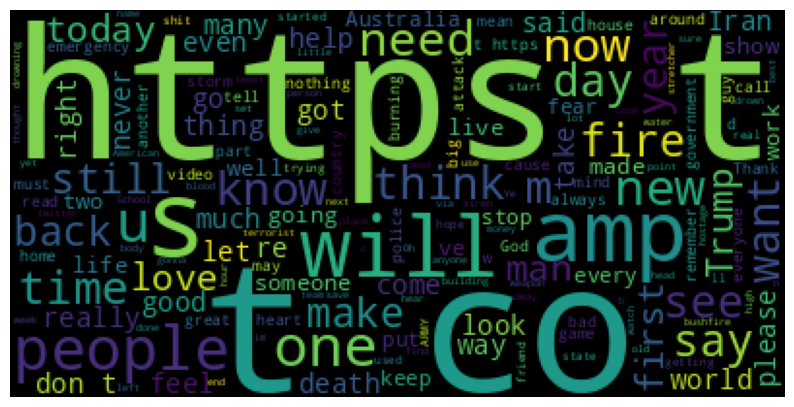

In [28]:
full_txt = " ".join(df.text[df.target == 0])
wc = WordCloud()
img = wc.generate_from_text(full_txt)
plt.figure(figsize=(10,6))
plt.imshow(img)
plt.axis("off")
plt.show()

In [29]:
df.location.unique()

array(['United States', 'New York City', 'Morgantown, WV', ...,
       'Blue State in a red sea', 'arohaonces', 'auroraborealis'],
      dtype=object)

# C. DATA PREPROCESSING

In [30]:
# Cleaning the text data by removing special characters and numbers
def clean_text(text):
    # Remove URLs and mentions but keep words in any language
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    # Keep alphabets from any language, numbers and spaces; remove everything else
    text = re.sub(r'[^A-Za-z0-9가-힣\s]', '', text)  # This includes Korean characters
    return text.lower()  # Convert to lowercase to maintain consistency

df.head()

,keyword,location,text,target
id,,,,
0,ablaze,United States,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,ablaze,United States,Telangana: Section 144 has been imposed in Bha...,1
2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,ablaze,United States,"""Lord Jesus, your love brings freedom and pard...",0


## 1. Lower-casing

In [31]:
df = pd.read_csv("/content/tweets.csv", header=None, sep='\r\n', engine='python',names=['tweets'])
df['lowercase'] = df['tweets'].apply(lambda x: (x.lower()))
print (df)

                                                  tweets  \
0                        id,keyword,location,text,target   
1      0,ablaze,,"Communal violence in Bhainsa, Telan...   
2      1,ablaze,,"Telangana: Section 144 has been imp...   
3      2,ablaze,New York City,Arsonist sets cars abla...   
4      3,ablaze,"Morgantown, WV",Arsonist sets cars a...   
...                                                  ...   
11373  11365,wrecked,Blue State in a red sea,Media sh...   
11374  11366,wrecked,arohaonces,i feel directly attac...   
11375  11367,wrecked,🇵🇭,i feel directly attacked 💀 i ...   
11376  11368,wrecked,auroraborealis,"ok who remember ...   
11377  11369,wrecked,,Jake Corway wrecked while runni...   

                                               lowercase  
0                        id,keyword,location,text,target  
1      0,ablaze,,"communal violence in bhainsa, telan...  
2      1,ablaze,,"telangana: section 144 has been imp...  
3      2,ablaze,new york city,arsonist sets

## 2. Removing Punctuations

In [32]:
import string

In [33]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))
    df['lowercase'] = df['lowercase'].apply(remove_punctuation)

In [34]:
print(df['lowercase'])

0                          id,keyword,location,text,target
1        0,ablaze,,"communal violence in bhainsa, telan...
2        1,ablaze,,"telangana: section 144 has been imp...
3        2,ablaze,new york city,arsonist sets cars abla...
4        3,ablaze,"morgantown, wv",arsonist sets cars a...
                               ...                        
11373    11365,wrecked,blue state in a red sea,media sh...
11374    11366,wrecked,arohaonces,i feel directly attac...
11375    11367,wrecked,🇵🇭,i feel directly attacked 💀 i ...
11376    11368,wrecked,auroraborealis,"ok who remember ...
11377    11369,wrecked,,jake corway wrecked while runni...
Name: lowercase, Length: 11378, dtype: object


## 3. Tokenization

In [36]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [37]:
df['tokens'] = df['lowercase'].apply(word_tokenize)

In [38]:
df[['lowercase', 'tokens']].head()

,lowercase,tokens
0,"id,keyword,location,text,target","[id, ,, keyword, ,, location, ,, text, ,, target]"
1,"0,ablaze,,""communal violence in bhainsa, telan...","[0, ,, ablaze, ,, ,, '', communal, violence, i..."
2,"1,ablaze,,""telangana: section 144 has been imp...","[1, ,, ablaze, ,, ,, '', telangana, :, section..."
3,"2,ablaze,new york city,arsonist sets cars abla...","[2, ,, ablaze, ,, new, york, city, ,, arsonist..."
4,"3,ablaze,""morgantown, wv"",arsonist sets cars a...","[3, ,, ablaze, ,, '', morgantown, ,, wv, '', ,..."


## 4.Remove stopwords

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [40]:
STOPWORDS = set(stopwords.words('english'))

In [41]:
df['tokens'] = df['tokens'].apply(lambda x: [word for word in x if word.lower() not in STOPWORDS])

In [42]:
print(df['tokens'].head())

0    [id, ,, keyword, ,, location, ,, text, ,, target]
1    [0, ,, ablaze, ,, ,, '', communal, violence, b...
2    [1, ,, ablaze, ,, ,, '', telangana, :, section...
3    [2, ,, ablaze, ,, new, york, city, ,, arsonist...
4    [3, ,, ablaze, ,, '', morgantown, ,, wv, '', ,...
Name: tokens, dtype: object


### 5. REMOVE FREQUENT WORDS

In [43]:
from collections import Counter

In [44]:
cnt = Counter()

In [45]:
for token_list in df['tokens'].values:
    for word in token_list:
        cnt[word] += 1

#### Removing words repeated more than 5 times

In [46]:
frequent =set([x for x,y in cnt.items() if y > 5])
df['tokens'] = df['tokens'].apply(lambda x: " ".join([w for w in x if w in frequent]))

In [47]:
print (frequent)

{'ev…', 'orleans', 'web', 'leni', 'cambridge', 'shop', 'attention', 'pakistan', 'completely', 'fully', '20disaster', 'portugal', '..', 'best', 'station', '20burning', 'human', 'ongoing', 'suffolk', 'auspol', 'machine', 'pls', 'genocide', 'di…', 'seeking', 'drinking', 'rescue', 'meme', 'erupted', 'carrying', '🚨', 'vaccines', 'kiss', 'sold', 'quickly', 'unfortunate', 'speaker', 'unit', 'directed', 'hatred', 'united', 'views', 'ago', 'alert', 'reaction', 'scared', 'start', 'france', 'lion', 'failure', 'younger', 'kent', 'heartbreaking', 'at…', 'calabarzon', 'abuse', 'wave', 'razed', 'extinction', 'website', 'pe…', 'better', 'came', 'persons', 'rubble', 'smear', 'dreams', "n't", 'beijing', 'oc', 'fun', 'creation', 'ad', 'ben_wounds', 'beauty', 'pensacola', 'guest', 'w', 'actions', 'block', 'jakupovic', 'south', 'hv', 'they/them', 'enjoy', 'mark', 'four', 'lumpur', '20fires', 'na', 'states', 'typhoon', 'upon', 'joe', 'longer', '.…', 'emotional', 'tennessee', 'apologies', '…', 'scotland', 'c

### 6.Stemming

In [48]:
from nltk.stem.porter import PorterStemmer

In [49]:
stemmer = PorterStemmer()

In [50]:
df['tokens']=df['tokens'].apply(lambda x: (" ".join([stemmer.stem(word) for word in x.split() ])))

### 7. Lemmatization

In [51]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')  # Download WordNet
nltk.download('omw-1.4')  # Download additional resources for lemmatizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [52]:
lemm = WordNetLemmatizer()


In [53]:
df['lemmatized']=df['tokens'].apply(lambda x: (" ".join([lemm.lemmatize(word) for word in x.split() ])))

In [54]:
for i in range(5):
    print(f"Lemmatized tokens for row {i}: {df['lemmatized'][i]}")

Lemmatized tokens for row 0: id , , locat , text , target
Lemmatized tokens for row 1: , ablaz , , '' violenc bhainsa , telangana . `` `` stone muslim ' hous hous vehicl set '' ,1
Lemmatized tokens for row 2: 1 , ablaz , , '' telangana : section bhainsa januari 13 15 , clash erupt two group januari '' ,1
Lemmatized tokens for row 3: 2 , ablaz , new york citi , arsonist set car ablaz http :
Lemmatized tokens for row 4: 3 , ablaz , '' , '' , arsonist set car ablaz http : http :


# D.Data Visualization

In [55]:
print(df.columns)

Index(['tweets', 'lowercase', 'tokens', 'lemmatized'], dtype='object')


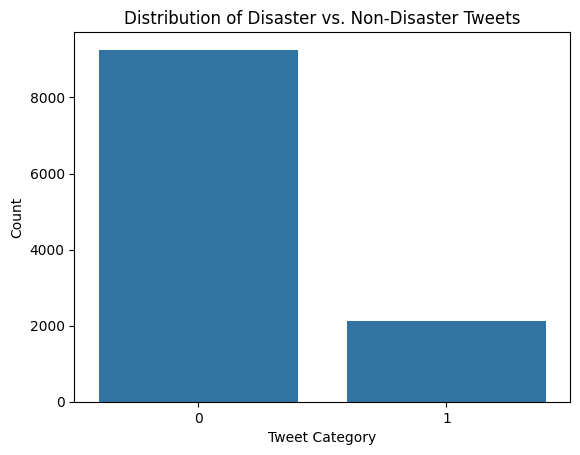

In [56]:
df = pd.read_csv("/content/tweets.csv")
df = pd.read_csv("/content/tweets.csv",index_col="id")
sns.countplot(x='target', data=df)
plt.title('Distribution of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Tweet Category')
plt.ylabel('Count')
plt.show()

<ipython-input-57-18b78457a2e6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')


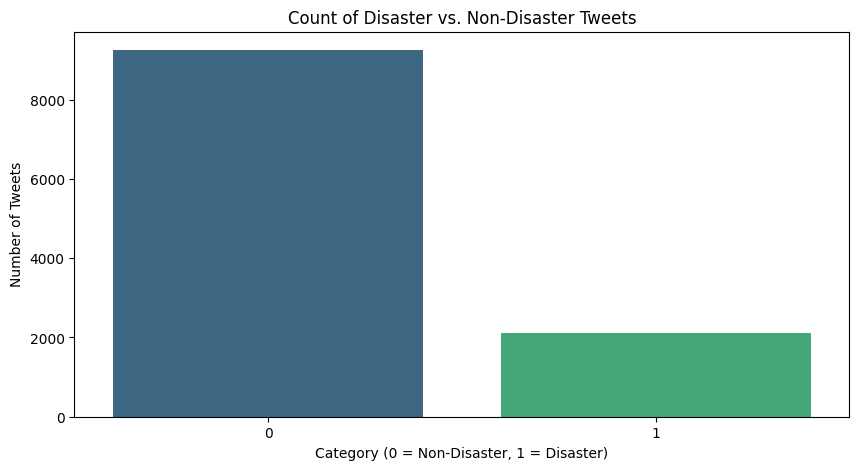

In [57]:
disaster_counts = df['target'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette='viridis')
plt.title('Count of Disaster vs. Non-Disaster Tweets')
plt.xlabel('Category (0 = Non-Disaster, 1 = Disaster)')
plt.ylabel('Number of Tweets')
plt.show()

#### Finding most common keywords


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-60-e31716c4dc22>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='magma')


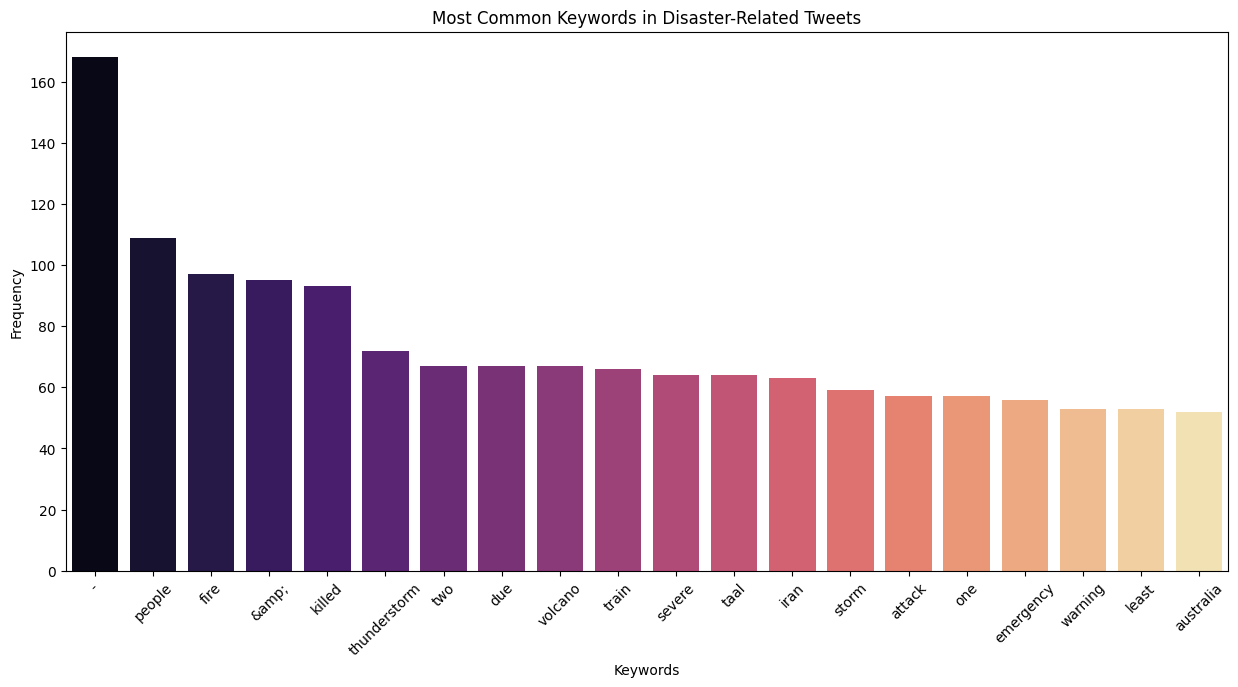

In [60]:
# Finding the most common keywords in disaster-related tweets
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

if 'lowercase' not in df.columns:
    df['lowercase'] = df['text'].str.lower()


STOPWORDS = set(stopwords.words('english'))
disaster_tweets = df[df['target'] == 1]['lowercase']
all_words = ' '.join(disaster_tweets).split()
filtered_words = [word for word in all_words if word not in STOPWORDS]
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

# Plotting the most common keywords
words, counts = zip(*common_words)
plt.figure(figsize=(15, 7))
sns.barplot(x=list(words), y=list(counts), palette='magma')
plt.title('Most Common Keywords in Disaster-Related Tweets')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

## E. n-gram Analysis

In [61]:
from nltk import ngrams
from collections import Counter
df['tokens'] = df['lowercase'].apply(word_tokenize)

def get_top_ngrams(texts, n=2, top_k=10):
    """
    Get the top N n-grams from a list of texts.
    :param texts: List of tokenized texts
    :param n: Size of the n-gram (e.g., 2 for bigram, 3 for trigram)
    :param top_k: Number of top n-grams to return
    :return: List of tuples with the n-grams and their counts
    """
    ngram_list = []
    for tokens in texts:
        ngram_list.extend(ngrams(tokens, n))
    ngram_counts = Counter(ngram_list)
    return ngram_counts.most_common(top_k)

# Separate disaster and non-disaster tweets
disaster_tweets = df[df['target'] == 1]['tokens']
non_disaster_tweets = df[df['target'] == 0]['tokens']

# Get the top trigrams for disaster tweets
top_disaster_trigrams = get_top_ngrams(disaster_tweets, n=3, top_k=10)
print("\nTop 10 Trigrams in Disaster Tweets:")
print(top_disaster_trigrams)

# Get the top trigrams for non-disaster tweets
top_non_disaster_trigrams = get_top_ngrams(non_disaster_tweets, n=3, top_k=10)
print("\nTop 10 Trigrams in Non-Disaster Tweets:")
print(top_non_disaster_trigrams)


Top 10 Trigrams in Disaster Tweets:
[(('&', 'amp', ';'), 103), (('.', 'https', ':'), 62), (('severe', 'thunderstorm', 'warning'), 35), ((':', 'https', ':'), 29), (('a', 'freight', 'train'), 22), (('…', 'https', ':'), 21), (('due', 'to', 'the'), 20), (('it', '’', 's'), 19), (('i', '’', 'm'), 19), (('freight', 'train', 'has'), 19)]

Top 10 Trigrams in Non-Disaster Tweets:
[(('&', 'amp', ';'), 498), (('.', 'https', ':'), 198), (('it', '’', 's'), 170), (('i', '’', 'm'), 163), (('!', '!', '!'), 149), (('don', '’', 't'), 113), (('…', 'https', ':'), 95), (('t…', 'https', ':'), 88), ((':', 'https', ':'), 81), (('!', 'https', ':'), 77)]


## F. Feature Engineering

### Bag of Words


In [63]:
print(df.head())
print(df.info())
print(df.isnull().sum())
print(df.describe(include='all'))

   keyword        location                                               text  \
id                                                                              
0   ablaze             NaN  Communal violence in Bhainsa, Telangana. "Ston...   
1   ablaze             NaN  Telangana: Section 144 has been imposed in Bha...   
2   ablaze   New York City  Arsonist sets cars ablaze at dealership https:...   
3   ablaze  Morgantown, WV  Arsonist sets cars ablaze at dealership https:...   
4   ablaze             NaN  "Lord Jesus, your love brings freedom and pard...   

    target                                          lowercase  \
id                                                              
0        1  communal violence in bhainsa, telangana. "ston...   
1        1  telangana: section 144 has been imposed in bha...   
2        1  arsonist sets cars ablaze at dealership https:...   
3        1  arsonist sets cars ablaze at dealership https:...   
4        0  "lord jesus, your love brings 

### TF-TDF

In [68]:
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Define lemmatization function
def lemmatize_text(text):
    tokens = word_tokenize(text.lower())
    return ' '.join([lemmatizer.lemmatize(word) for word in tokens])

# Apply the function and create the 'lemmatized' column
if 'lemmatized' not in df.columns:
    df['lemmatized'] = df['text'].apply(lemmatize_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [69]:

print(df['lemmatized'].head())
print(df['lemmatized'].isnull().sum())  # Check for null values
print(df['lemmatized'].apply(lambda x: len(x.split())).value_counts())

id
0    communal violence in bhainsa , telangana . `` ...
1    telangana : section 144 ha been imposed in bha...
2    arsonist set car ablaze at dealership http : /...
3    arsonist set car ablaze at dealership http : /...
4    `` lord jesus , your love brings freedom and p...
Name: lemmatized, dtype: object
0
lemmatized
23    973
24    961
22    868
25    844
21    731
26    700
20    622
27    543
19    516
28    436
18    418
17    373
16    326
29    321
15    286
13    270
14    254
10    211
12    211
11    204
30    190
9     162
31    142
8     133
7     127
6     107
5     100
32     78
4      69
3      49
33     40
2      30
34     26
35     21
1      14
36      5
37      3
39      2
43      2
38      1
40      1
Name: count, dtype: int64


In [72]:
print(df['lemmatized'].head())  # Inspect the first few entries
print(df['lemmatized'].isnull().sum())  # Check for any null values
print(df['lemmatized'].apply(lambda x: len(x) == 0).sum())  # Check for empty strings


id
0    communal violence in bhainsa , telangana . `` ...
1    telangana : section 144 ha been imposed in bha...
2    arsonist set car ablaze at dealership http : /...
3    arsonist set car ablaze at dealership http : /...
4    `` lord jesus , your love brings freedom and p...
Name: lemmatized, dtype: object
0
0


In [73]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Filter out rows where 'lemmatized' is empty or contains only stop words
df = df[df['lemmatized'].apply(lambda x: any(word not in ENGLISH_STOP_WORDS for word in x.split()))]


In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_text = tfidf.fit_transform(df['lemmatized'])


In [75]:
import warnings


# Define a custom tokenizer to handle lists of tokens
tfidf = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)

# Fit and transform the lemmatized column directly
X_text = tfidf.fit_transform(df['lemmatized'])

# Create a DataFrame from the TF-IDF matrix
tfidf_df = pd.DataFrame(X_text.toarray(), columns=tfidf.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [76]:
from sklearn.preprocessing import OneHotEncoder

# Use OneHotEncoder for categorical features like 'keyword'
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_keyword = encoder.fit_transform(df[['keyword']])

In [77]:
from scipy.sparse import hstack

# Combine TF-IDF text vectors and encoded categorical features
X_combined = hstack([X_text, X_keyword])


In [78]:
print("Shape of TF-IDF matrix:", X_text.shape)


Shape of TF-IDF matrix: (11366, 911)


In [79]:
print("Shape of One-Hot Encoded matrix:", X_keyword.shape)


Shape of One-Hot Encoded matrix: (11366, 219)


In [80]:
from scipy.sparse import hstack

# Combine TF-IDF text vectors and encoded categorical features
X_combined = hstack([X_text, X_keyword])

# Check the shape of the combined features
print("Shape of Combined Features matrix:", X_combined.shape)

Shape of Combined Features matrix: (11366, 1130)


## SMOTE

In [81]:
!pip install imbalanced-learn


In [82]:
from imblearn.over_sampling import SMOTENC
import numpy as np

# Specify the indices of categorical features
categorical_features = np.array([False] * X_text.shape[1] + [True] * X_keyword.shape[1])

# Create a list of indices for categorical features
categorical_indices = list(range(X_text.shape[1], X_text.shape[1] + X_keyword.shape[1]))

# Apply SMOTENC
smote_nc = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_resampled, y_resampled = smote_nc.fit_resample(X_combined, df['target'])

### Splitting Data into Training and Testing Sets


In [83]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

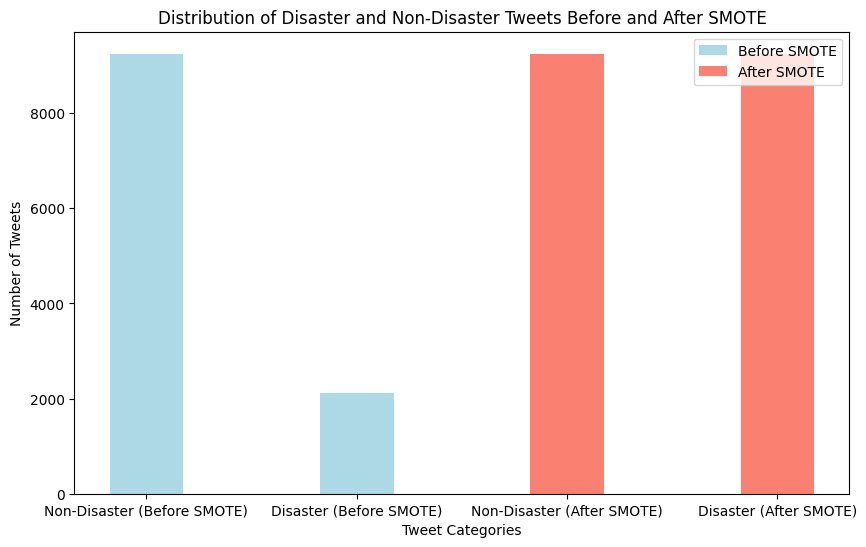

In [84]:
import matplotlib.pyplot as plt
import pandas as pd

# Check if tweets_df and y_resampled are defined
if 'df' in globals() and 'y_resampled' in globals():
    # Count the original distribution before SMOTE
    original_counts = df['target'].value_counts()

    # Count the distribution after SMOTE
    after_smote_counts = pd.Series(y_resampled).value_counts()

    # Plotting the counts before and after SMOTE
    fig, ax = plt.subplots(figsize=(10, 6))
    width = 0.35  # Bar width

    # Create the bar plot
    ax.bar(['Non-Disaster (Before SMOTE)', 'Disaster (Before SMOTE)'],
           original_counts, width, label='Before SMOTE', color='lightblue')
    ax.bar(['Non-Disaster (After SMOTE)', 'Disaster (After SMOTE)'],
           after_smote_counts, width, label='After SMOTE', color='salmon')

    # Add labels, title, and legend
    ax.set_xlabel("Tweet Categories")
    ax.set_ylabel("Number of Tweets")
    ax.set_title("Distribution of Disaster and Non-Disaster Tweets Before and After SMOTE")
    ax.legend()

    # Show plot
    plt.show()
else:
    print("Please ensure 'tweets_df' and 'y_resampled' are defined.")

## Model Training and Evaluation

### Logistic Regression

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report  # Import this

# Initialize and train the model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1873
           1       0.94      0.91      0.92      1828

    accuracy                           0.92      3701
   macro avg       0.92      0.92      0.92      3701
weighted avg       0.92      0.92      0.92      3701



### Random Forest Classifier


In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report  # Import this

# Initialize and train the model
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1873
           1       0.94      0.91      0.92      1828

    accuracy                           0.92      3701
   macro avg       0.92      0.92      0.92      3701
weighted avg       0.92      0.92      0.92      3701



### Support Vector Machine (SVM)


In [87]:
from sklearn.svm import SVC

# Initialize and train the model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1873
           1       0.92      0.83      0.87      1828

    accuracy                           0.88      3701
   macro avg       0.88      0.88      0.88      3701
weighted avg       0.88      0.88      0.88      3701



### K-Nearest Neighbors (KNN)


In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the model
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1873
           1       0.91      0.89      0.90      1828

    accuracy                           0.90      3701
   macro avg       0.90      0.90      0.90      3701
weighted avg       0.90      0.90      0.90      3701



#  Load and Explore Fake News Datasets

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
true= pd.read_csv(r"/content/tweets.csv")
true

,id,keyword,location,text,target
0,0,ablaze,NaN,"Communal violence in Bhainsa, Telangana. ""Ston...",1
1,1,ablaze,NaN,Telangana: Section 144 has been imposed in Bha...,1
2,2,ablaze,New York City,Arsonist sets cars ablaze at dealership https:...,1
3,3,ablaze,"Morgantown, WV",Arsonist sets cars ablaze at dealership https:...,1
4,4,ablaze,NaN,"""Lord Jesus, your love brings freedom and pard...",0
...,...,...,...,...,...
11365,11365,wrecked,Blue State in a red sea,Media should have warned us well in advance. T...,0
11366,11366,wrecked,arohaonces,i feel directly attacked 💀 i consider moonbin ...,0
11367,11367,wrecked,🇵🇭,i feel directly attacked 💀 i consider moonbin ...,0
11368,11368,wrecked,auroraborealis,"ok who remember ""outcast"" nd the ""dora"" au?? T...",0


In [92]:
fake = pd.read_csv(r"/content/train.csv")

In [93]:
fake.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [95]:
fake["text"].value_counts()

,count
text,
11-Year-Old Boy Charged With Manslaughter of Toddler: Report: An 11-year-old boy has been charged with manslaughter over the fatal sh...,10
He came to a land which was engulfed in tribal war and turned it into a land of peace i.e. Madinah. #ProphetMuhammad #islam,6
The Prophet (peace be upon him) said 'Save yourself from Hellfire even if it is by giving half a date in charity.',6
#Bestnaijamade: 16yr old PKK suicide bomber who detonated bomb in ... http://t.co/KSAwlYuX02 bestnaijamade bestnaijamade bestnaijamade beÛ_,6
Madhya Pradesh Train Derailment: Village Youth Saved Many Lives,5
...,...
Escape The Heat (and the #ORShow) for a trail run on Desolation Loop you'll be glad you did http://t.co/n2ucNzh38P http://t.co/VU8fWYMw5r,1
Hey girl you must be Toe Hobbit: Part Two: ghe Desolation of Smaug because I'm not interested in seeing you. Sorry.,1
Emotional Desolation the effect of alcoholism/addiction on family - http://t.co/31tGtLz3YA Forgiving is hard http://t.co/C7rcO2eMwF,1


In [97]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [101]:
fake["category"]=1
true["category"]=0

In [102]:
#joining the data the two data frame and reseting index
df=pd.concat([fake,true]).reset_index(drop=True)

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

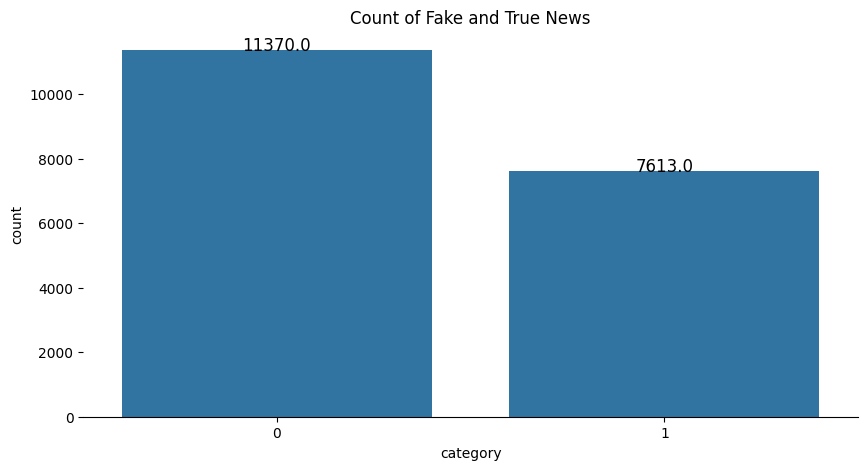

In [104]:
#creating a count plot for category column
fig = plt.figure(figsize=(10,5))



graph = sns.countplot(x="category", data=df)
plt.title("Count of Fake and True News")

#removing boundary
graph.spines["right"].set_visible(False)
graph.spines["top"].set_visible(False)
graph.spines["left"].set_visible(False)

#annoting bars with the counts
for p in graph.patches:
        height = p.get_height()
        graph.text(p.get_x()+p.get_width()/2., height + 0.2,height ,ha="center",fontsize=12)


#Data Cleaning


In [109]:
#checking the missing values in each columns
df.isna().sum()*100/len(df)

,0
id,0.000000
keyword,0.321340
location,31.349102
text,0.000000
target,0.000000
category,0.000000


In [112]:
# Assuming df is your DataFrame and it contains a 'text' column
blanks = []  # List to store indices of empty texts

# Index, label, and review of the doc
for index, text in df["text"].items():  # Use items() to iterate
    if text.isspace() or not text:  # Check for empty strings or strings with only spaces
        blanks.append(index)  # Add index to the empty list

# Print indices of blank texts
print("Indices of blank texts:", blanks)


Indices of blank texts: []


In [113]:

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import re

In [114]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [115]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print(len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print(len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print(len(Stopwords))

326
179
382


In [116]:
#text cleaning function
def clean_text(text):

    """
    It takes text as an input and clean it by applying several methods

    """

    string = ""

    #lower casing
    text=text.lower()

    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)

    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('[^A-Za-z0-9]+',' ', text)

    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "

    return string

In [117]:
#cleaning the whole data
df["text"]=df["text"].apply(clean_text)

In [118]:
from wordcloud import WordCloud

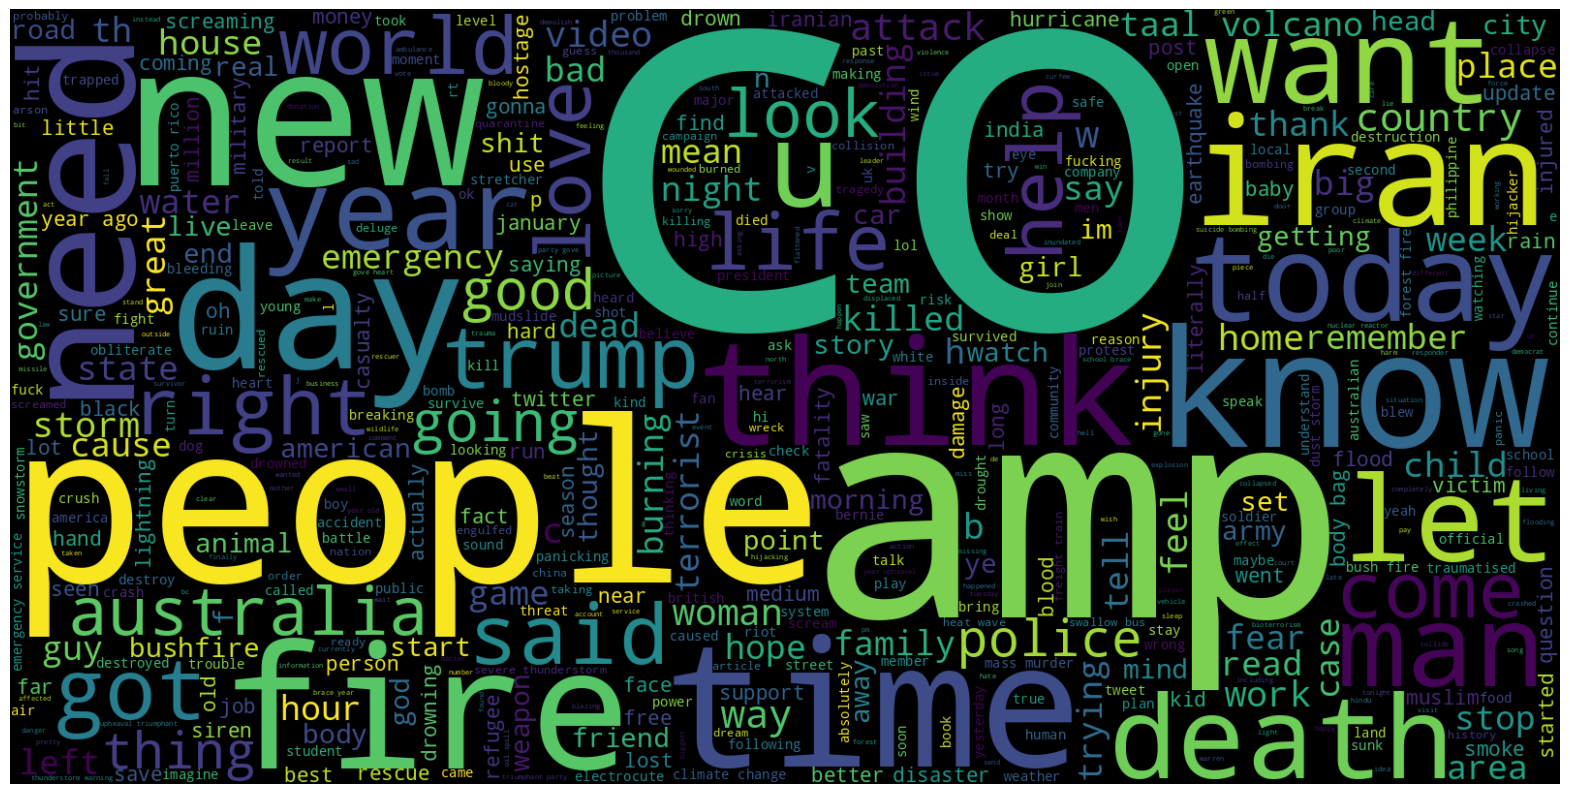

In [119]:
#True News
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df.category == 0].text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [120]:
#creating more intiuive wordcloud

#pil is pillow and used for image manupulation
from PIL import Image

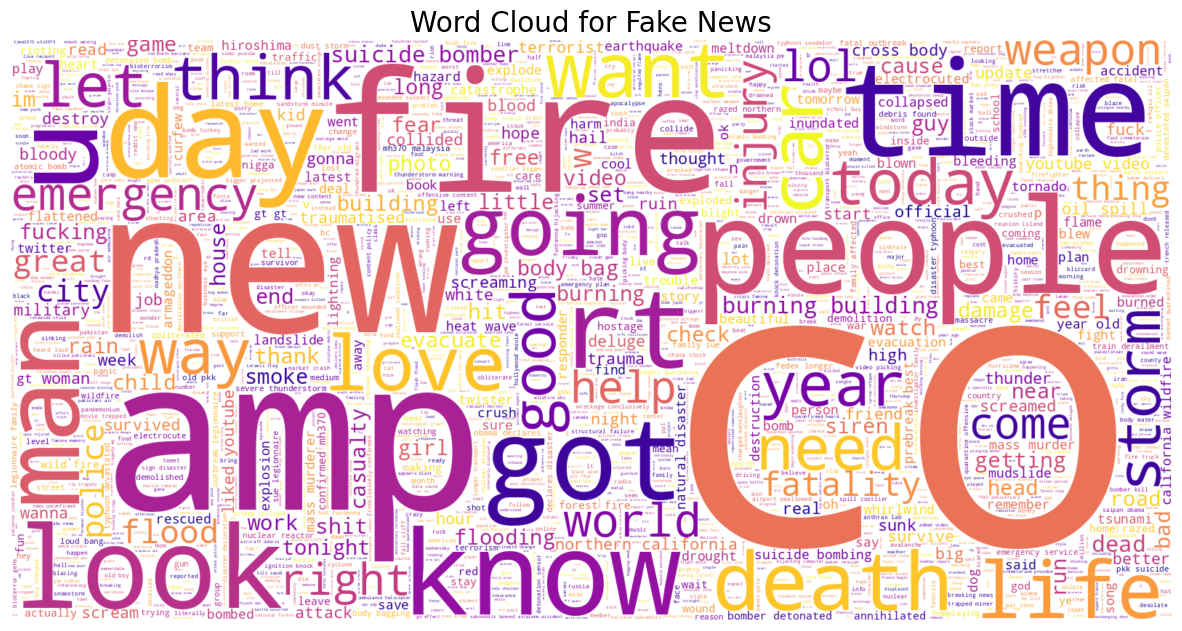

In [125]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np


mask_image = None  # or use a mask if you have one

# Create the WordCloud instance
Wc = WordCloud(mask=mask_image,
               max_words=2000,
               width=1600,
               height=800,
               colormap='plasma',  # Change colormap to your preference
               background_color='white')  # Optional background color

# Generate the word cloud from Fake News text
fake_news_text = " ".join(df[df.category == 1].text)  # Assuming category 1 is Fake News
Wc.generate(fake_news_text)

# Plotting the WordCloud
plt.figure(figsize=(15, 15))
plt.axis("off")  # Hide axes
plt.title("Word Cloud for Fake News", fontsize=20)  # Title for clarity
plt.imshow(Wc, interpolation='bilinear')
plt.show()  # Display the word cloud



##Feature-Extraction & Model building


In [126]:
#splitting the
from sklearn.model_selection import train_test_split


X=df["text"] #feature
y=df["category"] # traget

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [127]:
#importing libraries to build a pipline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [128]:
#this pipe line will take the text and vectorise it , and then TF-IDF, then fitting the model

text_clf=Pipeline([("tfidf",TfidfVectorizer()),("clf",LinearSVC())])
text_clf.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [129]:
#making prediction using the model
predictions=text_clf.predict(X_test)

In [130]:
from sklearn import metrics
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3791
           1       0.69      0.62      0.65      2474

    accuracy                           0.74      6265
   macro avg       0.73      0.72      0.72      6265
weighted avg       0.74      0.74      0.74      6265



In [131]:

#overall acuracy
print(metrics.accuracy_score(y_test,predictions))



0.7391859537110934


In [132]:
#confusion matrix
print(metrics.confusion_matrix(y_test,predictions))

[[3085  706]
 [ 928 1546]]
